In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [11]:
# Designate the file path, and various sets of features of interest.
filepath = "../data/elephant.csv"
features = ["country", "bin_year", "pop", "RRinc"]
features_ypi = ["bin_year", "pop", "RRinc"]
features_country = ["country", "bin_year", "pop", "RRinc"]
features_year_quintile = ["bin_year", "quintile", "RRinc"]
features_year_region = ["bin_year", "region", "quintile", "RRinc"]

# Read the data and reset the index.
elephant = pd.read_csv(filepath, header=0)
df = elephant.reset_index(drop=True)

def preprocess(df, year):
    df = df[(df.mysample == 1) & (df["bin_year"] == year)][features_ypi]
    # Sort by income
    df = df.sort_values(by=["RRinc"])
    df["cumpop"] = df["pop"].cumsum()
    df["quintile"] = pd.cut(df["cumpop"], 20, labels=range(20))
    result = df.groupby(by=["bin_year", "quintile"]).mean()
    return result

df_1988 = preprocess(df, 1988)
df_2008 = preprocess(df, 2008)
df_growth = (df_2008["RRinc"].values - df_1988["RRinc"].values) / df_1988["RRinc"].values
print(df_growth)
print("="*40)


[ 0.21368573  0.39071593  0.41927215  0.45931212  0.50964529  0.49651927
  0.52633357  0.63834639  0.66391615  0.69120623  0.79529326  0.73118522
  0.59416922  0.53376618  0.28376401  0.04738918 -0.0137109   0.07035271
  0.18253197  0.37828989]


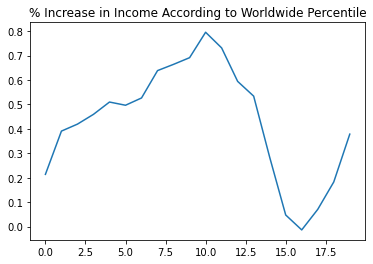

<Figure size 432x288 with 0 Axes>

In [14]:
# Render plot
plt.plot(df_growth)
plt.title("% Increase in Income According to Worldwide Percentile")
plt.show()
plt.tight_layout()
